In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline

In [2]:
df = pd.read_csv('../input/vgsales_ml.csv')
df['Year'] = df['Year'].apply(np.int64)
df.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,2,NES,1985,Pltform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role_Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Tabla Platform para Flourish 

In [3]:
df1 = df[['Platform','Year','Global_Sales']]
df1.head()

,Platform,Year,Global_Sales
0,Wii,2006,82.74
1,NES,1985,40.24
2,Wii,2008,35.82
3,Wii,2009,33.00
4,GB,1996,31.37


In [4]:
dft=df1.groupby(by=['Platform','Year']).sum().groupby(level=[0]).cumsum()
dft.head()

Global_Sales
Platform Year              
2600     1980         11.38
         1981         47.15
         1982         76.01
         1983         81.84
         1984         82.11

In [5]:
platform = dft.pivot_table('Global_Sales', ['Platform'], 'Year')
platform.fillna(0).head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,47.15,76.01,81.84,82.11,82.56,83.22,85.2,85.95,86.57,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,62.53,113.67,169.55,212.68,239.67,246.27,0.0,0.00
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.00,0.00,...,689.27,777.25,805.05,816.64,818.60,818.62,0.00,0.00,0.0,818.91


In [6]:
platform.to_csv('../input/Flourish/platform.csv')

# Tabla Genre para Flourish 

In [7]:
dfgen = df[['Genre','Year','Global_Sales']]
dfgen.head()

,Genre,Year,Global_Sales
0,Sports,2006,82.74
1,Pltform,1985,40.24
2,Racing,2008,35.82
3,Sports,2009,33.00
4,Role_Playing,1996,31.37


In [8]:
dfgen1=dfgen.groupby(by=['Genre','Year']).sum().groupby(level=[0]).cumsum()
dfgen1.head()

Global_Sales
Genre  Year              
Action 1980          0.34
       1981         15.18
       1982         21.70
       1983         24.56
       1984         26.41

In [9]:
genre = dfgen1.pivot_table('Global_Sales', ['Genre'], 'Year')
genre.fillna(0).head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,15.18,21.70,24.56,26.41,29.93,43.67,44.79,46.54,51.18,...,1049.38,1167.02,1285.98,1407.99,1533.21,1632.23,1702.93,1722.83,1722.84,0.0
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.78,0.00,0.00,...,173.56,190.13,206.11,212.10,218.71,224.77,232.80,234.59,0.00,0.0
Fighting,0.77,0.00,0.00,0.00,0.00,1.82,0.00,7.24,0.00,0.00,...,361.97,376.86,399.54,409.05,416.26,432.41,440.19,444.05,0.00,0.0
Misc,2.71,0.00,3.58,5.72,7.17,0.00,0.00,0.00,0.00,8.45,...,551.82,648.68,704.76,727.68,753.33,777.01,788.70,789.87,0.00,0.0
Pltform,0.00,6.93,11.96,18.89,19.58,62.75,72.14,73.88,101.61,122.27,...,708.46,740.36,768.47,787.00,812.12,821.01,827.06,829.13,0.00,0.0


In [10]:
genre.to_csv('../input/Flourish/Genre.csv')

# Tabla Publisher para Flourish

In [11]:
dfpub = df[['Publisher','Year','Global_Sales']]
dfpub.head()

,Publisher,Year,Global_Sales
0,Nintendo,2006,82.74
1,Nintendo,1985,40.24
2,Nintendo,2008,35.82
3,Nintendo,2009,33.00
4,Nintendo,1996,31.37


In [12]:
dfpub1=dfpub.groupby(by=['Publisher','Year']).sum().groupby(level=[0]).cumsum()
dfpub1.head()

Global_Sales
Publisher                    Year              
10TACLE Studios              2006          0.02
                             2007          0.11
1C Company                   2009          0.01
                             2011          0.10
20th Century Fox Video Games 1981          1.35

In [13]:
publisher = dfpub1.pivot_table('Global_Sales', ['Publisher'], 'Year')
publisher.fillna(0).head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Publisher,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C Company,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20th Century Fox Video Games,0.0,1.35,1.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2D Boy,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
publisher.to_csv('../input/Flourish/Publisher.csv')

# Tabla Games para Flourish

In [15]:
dfgame = df[['Name','Year','Global_Sales']]
dfgame.head()

,Name,Year,Global_Sales
0,Wii Sports,2006,82.74
1,Super Mario Bros.,1985,40.24
2,Mario Kart Wii,2008,35.82
3,Wii Sports Resort,2009,33.00
4,Pokemon Red/Pokemon Blue,1996,31.37


In [16]:
dfgame1=dfgame.groupby(by=['Name','Year']).sum().groupby(level=[0]).cumsum()
dfgame1.head()

,,Global_Sales
Name,Year,
'98 Koshien,1998,0.41
.hack//G.U. Vol.1//Rebirth,2006,0.17
.hack//G.U. Vol.2//Reminisce,2006,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),2006,0.16
.hack//G.U. Vol.3//Redemption,2007,0.17


In [17]:
game = dfgame1.pivot_table('Global_Sales', ['Name'], 'Year')
game.fillna(0).head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Name,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Vol.1//Rebirth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Vol.2//Reminisce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Vol.2//Reminisce (jp sales),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Vol.3//Redemption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
game.to_csv('../input/Flourish/Game.csv')

# Tabla Zonas para Flourish

In [20]:
dfzone = df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
dfzone.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2006,41.49,29.02,3.77,8.46
1,1985,29.08,3.58,6.81,0.77
2,2008,15.85,12.88,3.79,3.31
3,2009,15.75,11.01,3.28,2.96
4,1996,11.27,8.89,10.22,1.00


In [21]:
dfzone1=dfzone.groupby(by=['Year']).sum().groupby(level=[0]).cumsum()
dfzone1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


In [22]:
zone=dfzone1.T
zone

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
NA_Sales,10.59,33.40,26.92,7.76,33.28,33.73,12.50,8.46,23.87,45.15,...,338.85,304.24,241.00,154.93,154.77,131.97,102.82,22.66,0.00,0.27
EU_Sales,0.67,1.96,1.65,0.80,2.10,4.74,2.84,1.41,6.59,8.44,...,191.59,176.57,167.31,118.76,125.80,125.63,97.71,26.76,0.00,0.00
JP_Sales,0.00,0.00,0.00,8.10,14.27,14.56,19.81,11.63,15.76,18.36,...,61.89,59.49,53.04,51.74,47.59,39.46,33.72,13.67,0.05,0.00
Other_Sales,0.12,0.32,0.31,0.14,0.70,0.92,1.93,0.20,0.99,1.50,...,74.77,59.90,54.39,37.82,39.82,40.02,30.01,7.75,0.00,0.02


In [23]:
zone1=zone.cumsum(axis=1)
zone1

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
NA_Sales,10.59,43.99,70.91,78.67,111.95,145.68,158.18,166.64,190.51,235.66,...,3214.99,3519.23,3760.23,3915.16,4069.93,4201.90,4304.72,4327.38,4327.38,4327.65
EU_Sales,0.67,2.63,4.28,5.08,7.18,11.92,14.76,16.17,22.76,31.20,...,1568.15,1744.72,1912.03,2030.79,2156.59,2282.22,2379.93,2406.69,2406.69,2406.69
JP_Sales,0.00,0.00,0.00,8.10,22.37,36.93,56.74,68.37,84.13,102.49,...,985.51,1045.00,1098.04,1149.78,1197.37,1236.83,1270.55,1284.22,1284.27,1284.27
Other_Sales,0.12,0.44,0.75,0.89,1.59,2.51,4.44,4.64,5.63,7.13,...,519.18,579.08,633.47,671.29,711.11,751.13,781.14,788.89,788.89,788.91


In [24]:
zone1.to_csv('../input/Flourish/Zone.csv')

# Gráficas

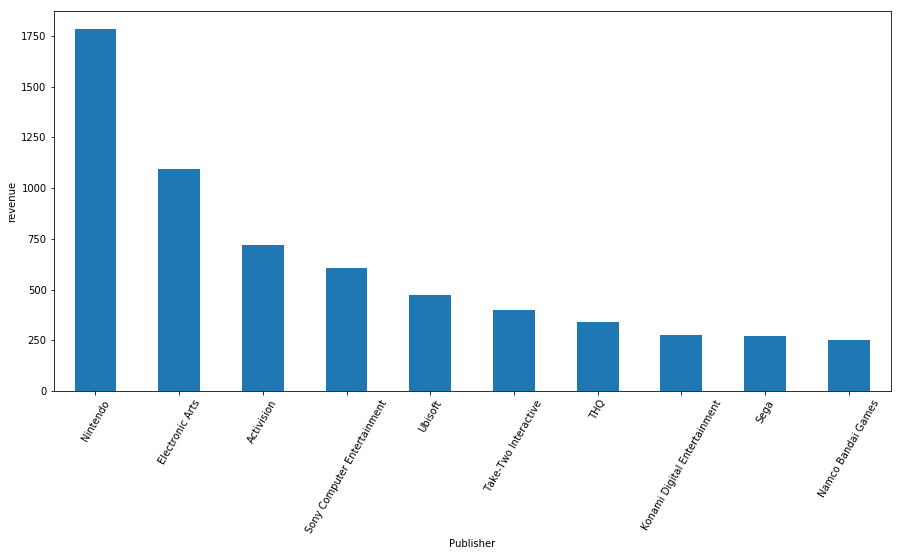

In [25]:
f,ax=plt.subplots(1,1,figsize=(15,7))
df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:10].plot(kind="bar")
ax.set_ylabel("revenue")
ticks=plt.setp(ax.get_xticklabels(), rotation=60, fontsize=10)

/home/rafa/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Text(0.5, 1.0, 'Max Global_Sales of games')

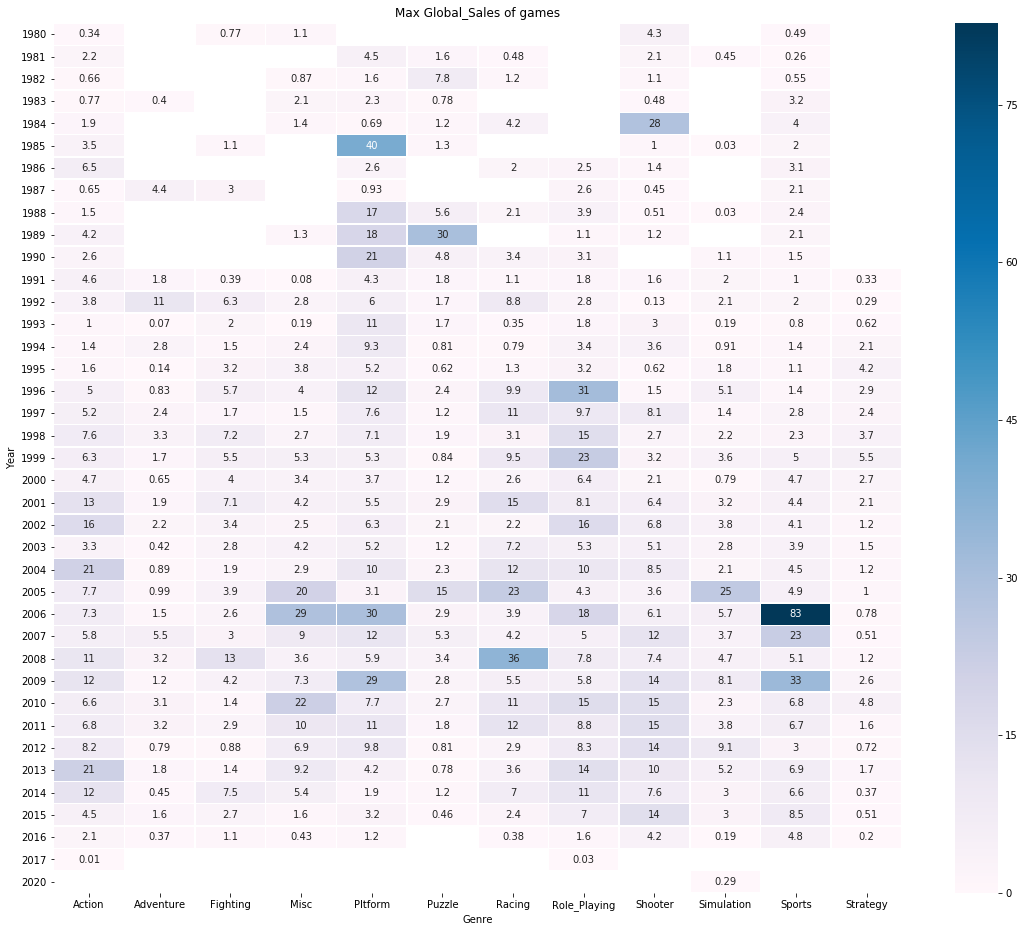

In [26]:
table_sales = pd.pivot_table(df,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='max',margins=False)

plt.figure(figsize=(19,16))
sns.heatmap(table_sales['Global_Sales'],linewidths=.5,annot=True,vmin=0.01,cmap='PuBu')
plt.title('Max Global_Sales of games')

Text(0.5, 1.0, 'Count of games')

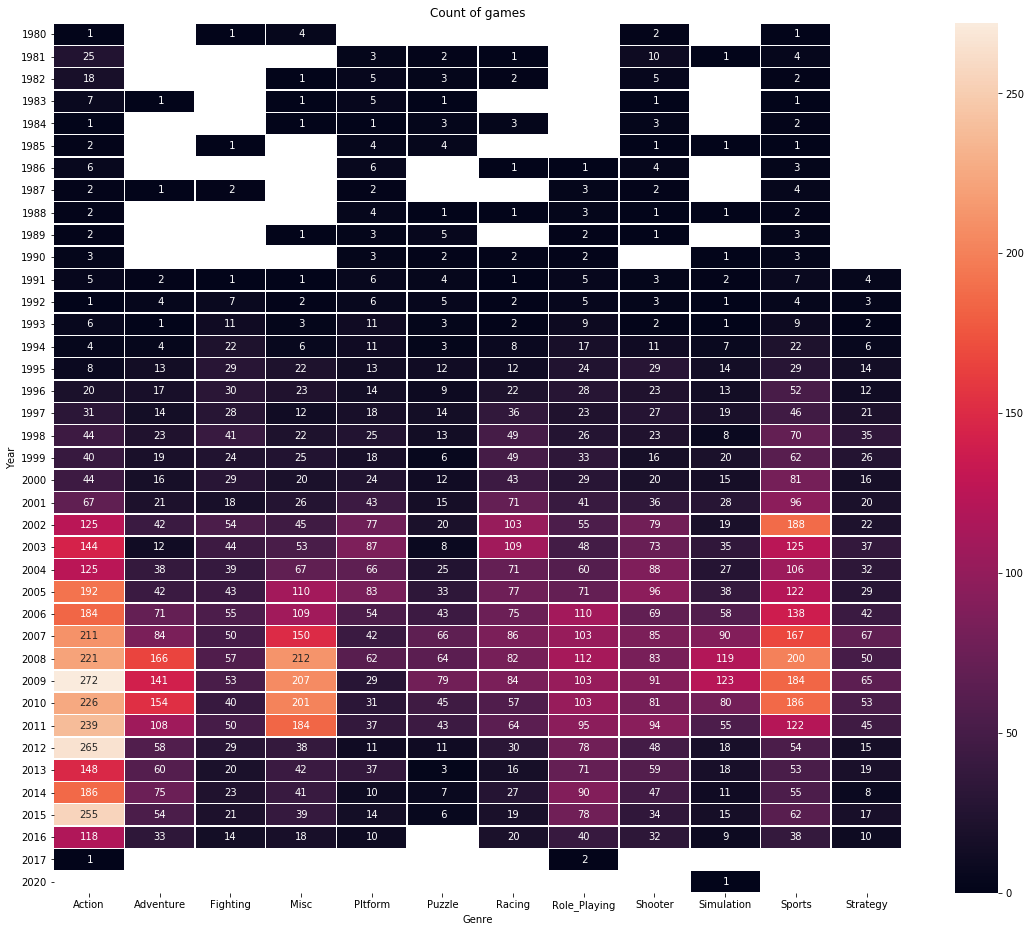

In [27]:
table_count = pd.pivot_table(df,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='count',margins=False)

plt.figure(figsize=(19,16))
sns.heatmap(table_count['Global_Sales'],linewidths=.5,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of games')

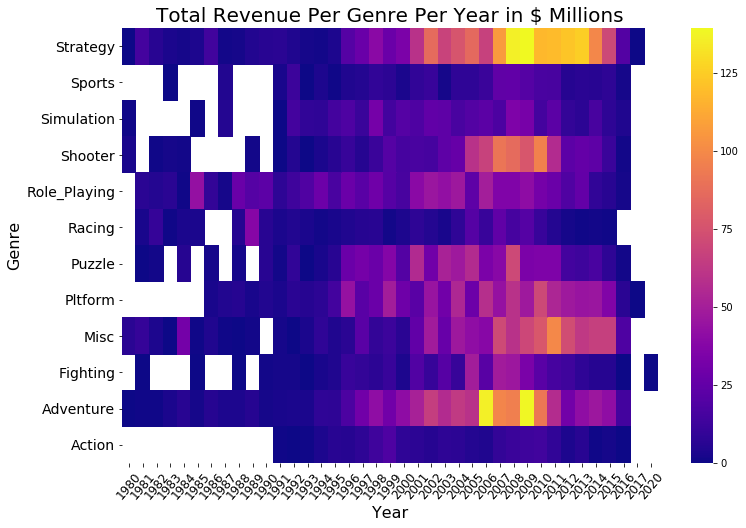

In [28]:
genres = ['Action', 'Adventure', 'Fighting', 'Misc', 'Pltform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
table = df.pivot_table('Global_Sales', columns='Genre', index='Year', aggfunc='sum')
data = [table[i] for i in genres]
data = np.array(data)
data = pd.DataFrame(np.reshape(data, (12, 39)))
years = table.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='plasma')
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
ax.set_yticklabels(labels = genres[::-1], fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Total Revenue Per Genre Per Year in $ Millions', fontsize=20)
plt.show();

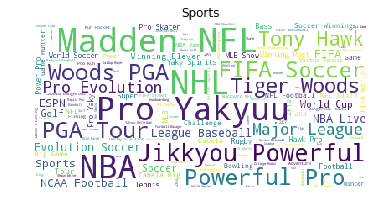

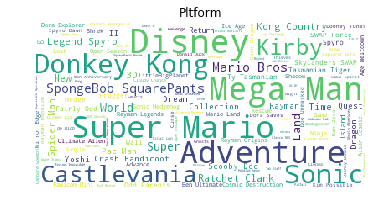

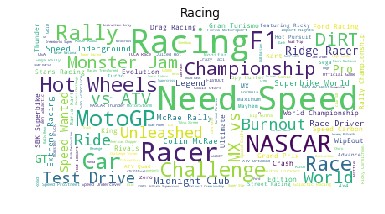

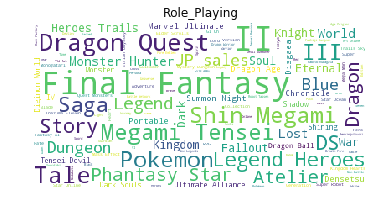

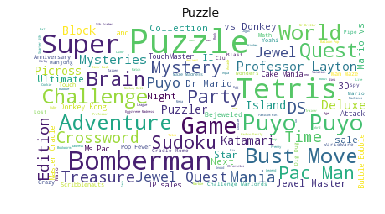

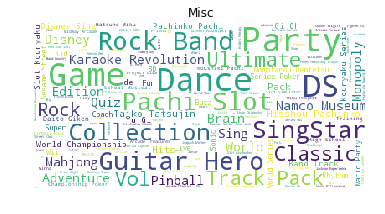

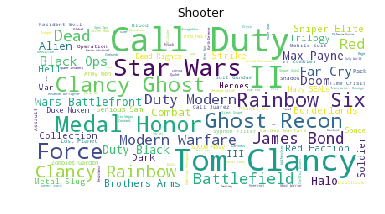

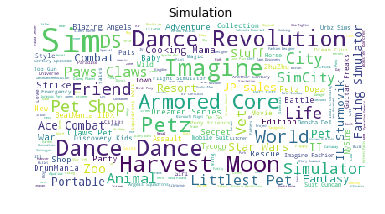

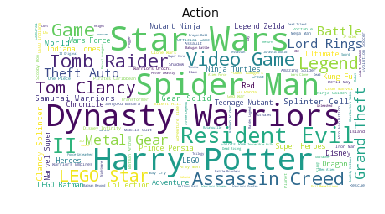

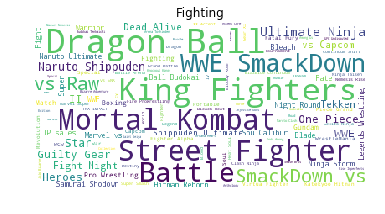

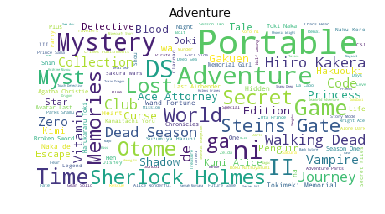

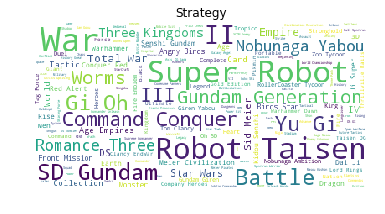

In [29]:
stopwords = set(STOPWORDS)

for x in df.Genre.unique():
    wc = WordCloud(background_color="white", max_words=2000, 
                   stopwords=stopwords, max_font_size=40, random_state=42)
    wc.generate(df.Name[df.Genre == x].to_string())
    plt.imshow(wc)
    plt.title(x)
    plt.axis("off")
    plt.show()

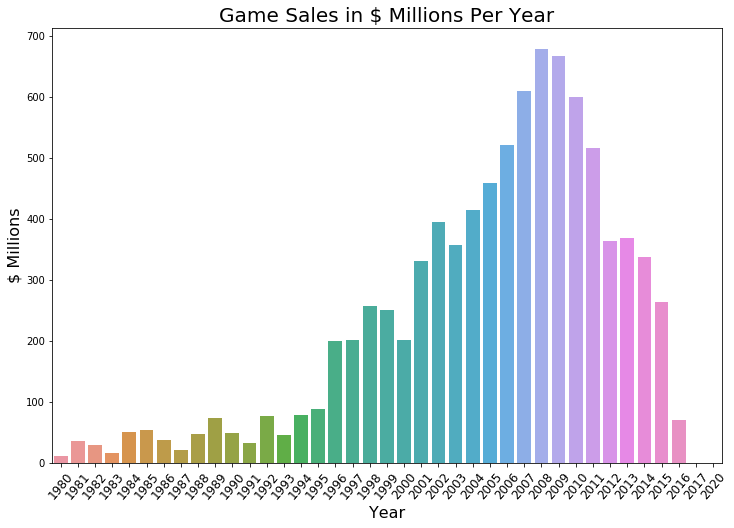

In [30]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

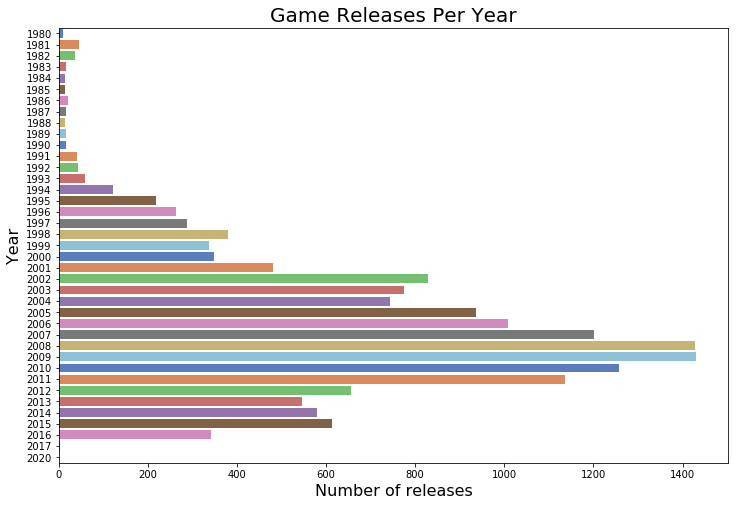

In [31]:
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

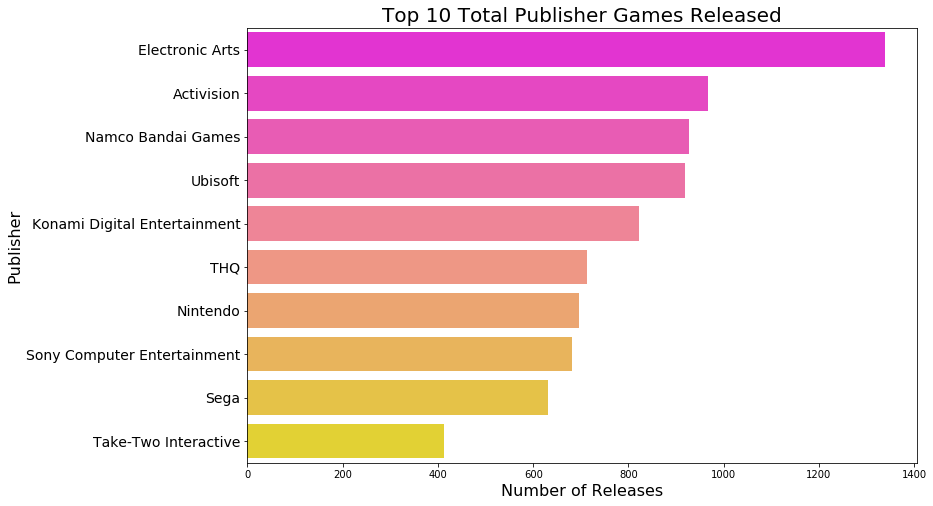

In [32]:
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

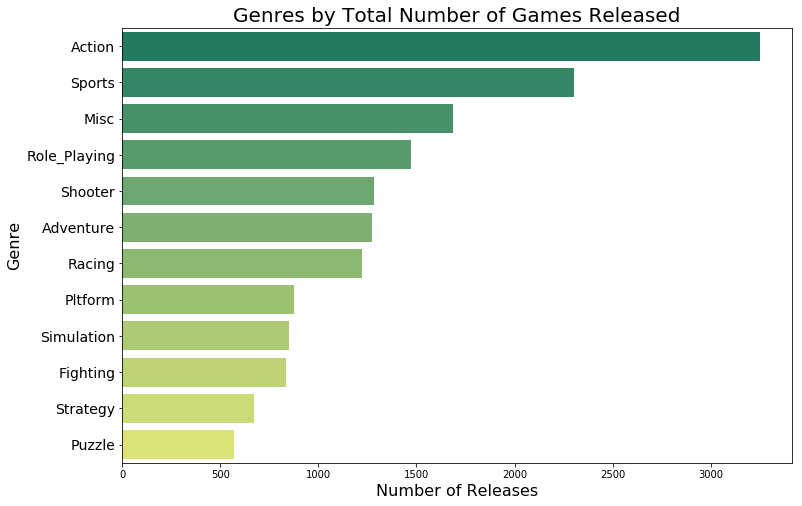

In [33]:
rel = df.groupby(['Genre']).count().iloc[:,0]
rel = pd.DataFrame(rel.sort_values(ascending=False))
genres = rel.index
rel.columns = ['Releases']

colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Releases', data=rel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

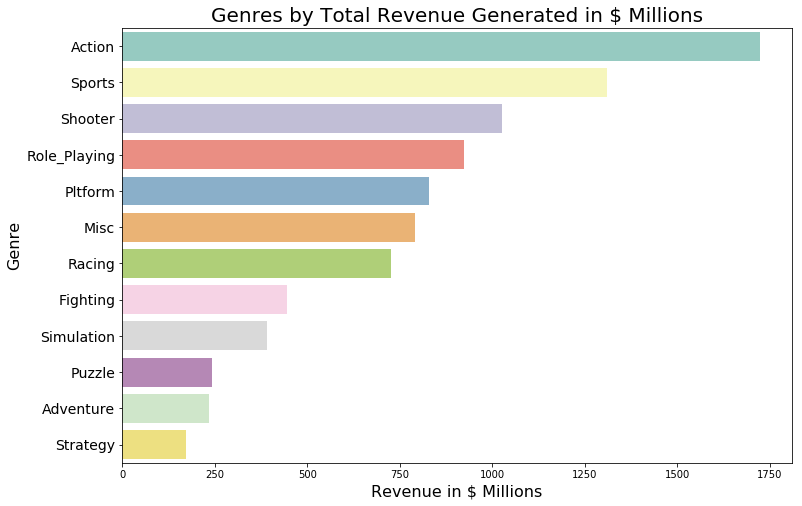

In [34]:
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

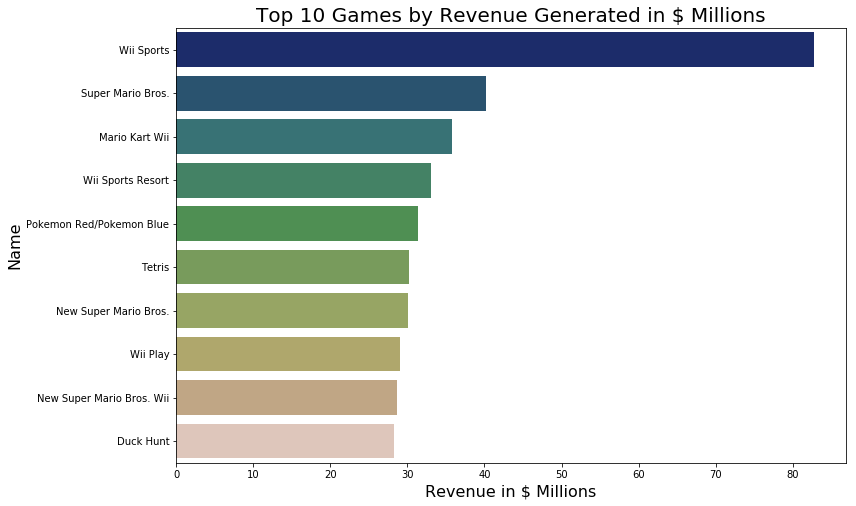

In [38]:
data = pd.concat([df['Name'][0:10], df['Global_Sales'][0:10]], axis=1)

plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = 'Name' , x = 'Global_Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
#ax.set_yticklabels(labels = games, fontsize=14)
plt.show();

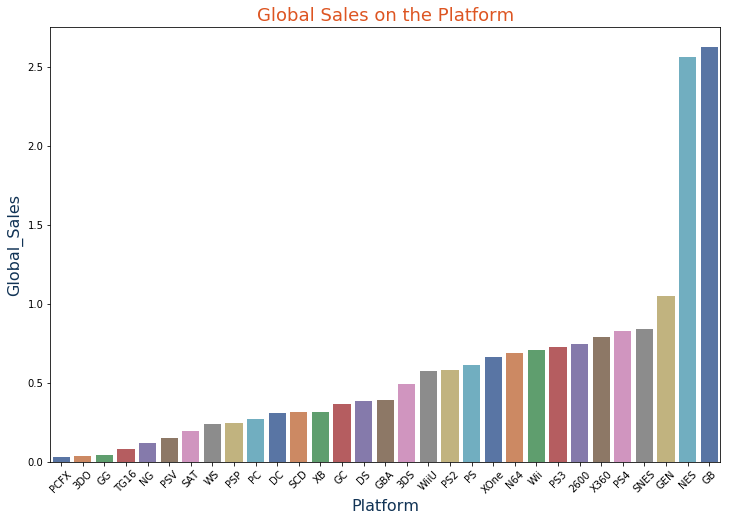

In [39]:
platform=list(df.Platform.unique())
global_sales=[]
for i in platform:
    val=df[df.Platform==i]
    x=val.Global_Sales.mean()
    global_sales.append(x)
      
d2=pd.DataFrame({'Platform':platform,'Global_Sales': global_sales})
d2.sort_values("Global_Sales",ascending=True,inplace=True)

#visualization
plt.figure(figsize=(12,8))
sns.barplot(x="Platform", y="Global_Sales", data=d2, palette="deep")
#sns.despine(left = True, right = True)
plt.xticks(rotation= 45)
plt.xlabel("Platform", fontsize=16, color="#123456")
plt.ylabel("Global_Sales", fontsize=16, color="#123456")
plt.title("Global Sales on the Platform", fontsize=18, color="#dd5522")
plt.show()

Text(0.5, 1.0, 'Platform')

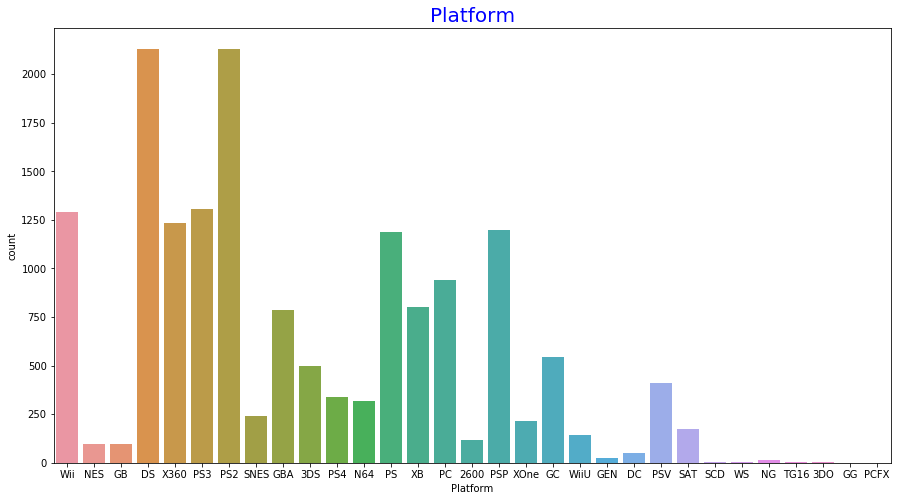

In [40]:
plt.subplots(figsize = (15,8))
sns.countplot(df.Platform)
plt.title("Platform",color = 'blue',fontsize=20)